# ECOMMERCE DATA ANALYSIS

## 1. Objective
- Sales Trend Over the specified period
- Analysis the sales driver based on 5Ps component: Product Category
- Analysis the sales driver based on 5Ps component: Place or Customer Location

## 2. Dataset: Olist.db

- Table olist_order_dataset
- Table olist_order_items_dataset

- olist_products_dataset
- product_category_name_translation

- olist_order_customer_dataset

## 3. Exploration & Processing
- NaN
- Outlier
- Incosistent Format
- Duplicated Data
- Data Wrangling
    - Joining relevant data
- Data Cleaning
    - Handling Missing Data
    - Handling incosistent format
    - Handling Outliers
    - Handling Duplicate Data
- Data Manipulation
    - Parsing Dates
    - Applying Function
    - Grouping or Pivoting


# 0. Pre Analysis
Mengimpor modul yang akan digunakan dan daftar table yang tersedia di Database 

In [613]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt

con = sqlite3.connect('olist.db')
def sql_fetch(con):
    cursorObj = con.cursor()
    cursorObj.execute('SELECT name from sqlite_master where type="table"')
    print(cursorObj.fetchall())

sql_fetch(con)


[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


# 1. Sales Trend
Melihat pergerakan sales selama periode yang tersedia di database

In [614]:
#Mengimpor tabel yang dibutuhkan untuk melihat sales

order_ds = pd.read_sql("SELECT * from olist_order_dataset", con)
order_item_ds = pd.read_sql("SELECT * from olist_order_items_dataset", con)

In [615]:
#melakukan cleaning nan value

order_ds.dropna()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [616]:
# Merubah data string menjadi data datetime

order_ds['order_approved_at'] = pd.to_datetime(order_ds['order_approved_at'])
order_ds['order_approved_at'] = order_ds['order_approved_at'].dt.date
order_ds

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...,...
99436,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [617]:
# Menggabungkan kedua tabel dengan key: order id

sales = order_ds.merge(order_item_ds, how='left', on='order_id')
sales = sales.drop( ['index_x', 'order_purchase_timestamp', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date', 'index_y', 'shipping_limit_date'],axis=1)

In [618]:
# Melakukan drop nan value 

sales = sales.dropna()

In [619]:
sales

,order_id,customer_id,order_status,order_approved_at,order_item_id,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72
...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.90,20.10
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.99,65.02
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.99,40.59


In [620]:
# Melakukan grouping sesuai dengan tanggal pemesanannya

sales = sales.groupby(['order_approved_at']).sum()
sales

C:\Users\Teuku Ghaisa Aufa\AppData\Local\Temp\ipykernel_18204\3577536230.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales = sales.groupby(['order_approved_at']).sum()


,order_item_id,price,freight_value
order_approved_at,,,
2016-09-15,6.0,134.97,8.49
2016-10-04,21.0,2443.57,382.90
2016-10-05,21.0,1622.05,282.95
2016-10-06,149.0,17515.56,2494.69
2016-10-07,103.0,10559.80,1549.89
...,...,...,...
2018-08-26,89.0,10219.14,1288.97
2018-08-27,66.0,5726.50,721.28
2018-08-28,71.0,5106.30,631.98


In [621]:
# mendrop column yang tidak relevan 

sales = sales.drop(['order_item_id'], axis=1)
sales

,price,freight_value
order_approved_at,,
2016-09-15,134.97,8.49
2016-10-04,2443.57,382.90
2016-10-05,1622.05,282.95
2016-10-06,17515.56,2494.69
2016-10-07,10559.80,1549.89
...,...,...
2018-08-26,10219.14,1288.97
2018-08-27,5726.50,721.28
2018-08-28,5106.30,631.98


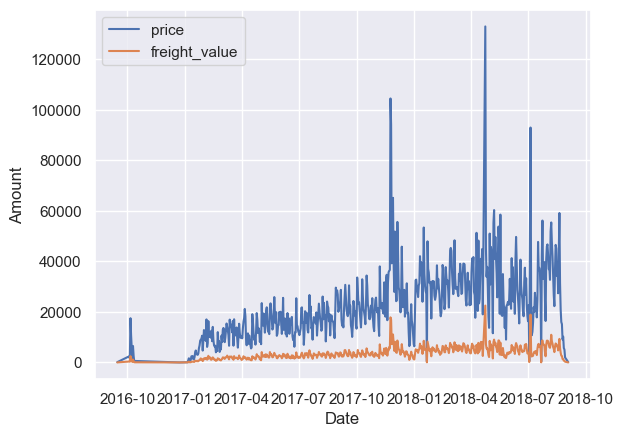

In [622]:
# Melakukan plotting time series dengan data yang ada namun hasilnya susah dibaca karena terlalu detail
sales.plot()
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

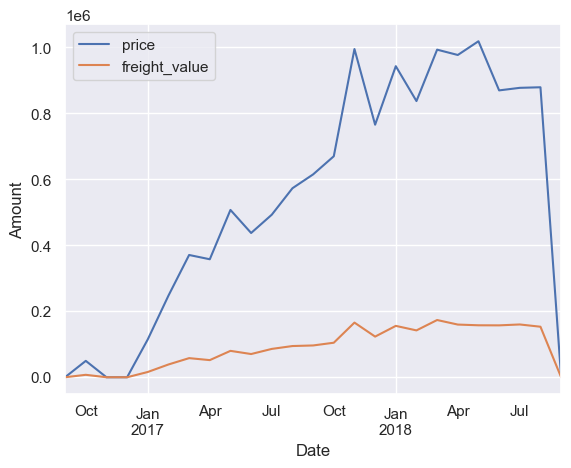

In [623]:
# Melakukan replotting dengan menggunakan resample agar frequency timeseries menjadi per bulan. 

sales.index = pd.to_datetime(sales.index)
sales_freq_month = sales.resample('M').sum()
sales_freq_month
sales_freq_month.plot()
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

## 2. Analyze Product Category
Melakukan analisis sales driver pada sisi kategori

In [624]:
# Mengimpor data dan melakukan join table pada tabel yang relevan

category = order_ds.merge(order_item_ds, how='left', on='order_id')
category = category.drop( ['index_x', 'order_purchase_timestamp', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date', 'index_y', 'shipping_limit_date'],axis=1)
category = category.dropna()

order_product = pd.read_sql("SELECT * from olist_products_dataset", con)
category = category.merge(order_product,how='left', on='product_id')
category = category[['order_id', 'order_approved_at', 'product_id', 'price', 'freight_value', 'product_category_name']]
category_translate = pd.read_sql("SELECT * from product_category_name_translation", con)
category = category.merge(category_translate, how='left', on='product_category_name')
category

,order_id,order_approved_at,product_id,price,freight_value,product_category_name,index,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,7.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,6.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,2.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,29.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,12.0,stationery
...,...,...,...,...,...,...,...,...
112630,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,bebes,11.0,baby
112631,83c1379a015df1e13d02aae0204711ab,2017-08-27,b80910977a37536adeddd63663f916ad,205.99,65.02,eletrodomesticos_2,56.0,home_appliances_2
112632,11c177c8e97725db2631073c19f07b62,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,1.0,computers_accessories
112633,11c177c8e97725db2631073c19f07b62,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,informatica_acessorios,1.0,computers_accessories


In [625]:
# Melakukan groupby pada dua kolom, yaitu waktu order dan kategorinya. 

category = category.groupby(['order_approved_at', 'product_category_name_english'], as_index=False).sum()

C:\Users\Teuku Ghaisa Aufa\AppData\Local\Temp\ipykernel_18204\3843762223.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  category = category.groupby(['order_approved_at', 'product_category_name_english'], as_index=False).sum()


In [626]:
# Menghilankan nan value 

category = category.dropna()
category

,order_approved_at,product_category_name_english,price,freight_value,index
0,2016-09-15,health_beauty,134.97,8.49,0.0
1,2016-10-04,air_conditioning,299.99,19.01,24.0
2,2016-10-04,auto,9.90,8.72,2.0
3,2016-10-04,consoles_games,222.39,24.61,38.0
4,2016-10-04,cool_stuff,89.90,17.51,22.0
...,...,...,...,...,...
18177,2018-08-29,party_supplies,24.90,8.33,34.0
18178,2018-08-29,sports_leisure,6.90,7.39,5.0
18179,2018-08-29,toys,63.90,9.20,14.0
18180,2018-08-29,watches_gifts,268.80,16.40,18.0


In [627]:
# Melakukan pivoting agar kategori menjadi nama kolom dan tanggal order menjadi index
category = category.fillna(0)
category = category.pivot(index='order_approved_at', columns='product_category_name_english', values='price')
category

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_approved_at,,,,,,,,,,,,,,,,,,,,,
2016-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-04,NaN,299.99,NaN,NaN,NaN,9.90,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.50,NaN,NaN,NaN,637.70,NaN
2016-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.80,NaN,NaN,...,NaN,NaN,NaN,NaN,186.39,NaN,NaN,NaN,NaN,NaN
2016-10-06,NaN,1049.30,NaN,NaN,NaN,1134.87,1028.67,229.80,NaN,NaN,...,NaN,NaN,NaN,NaN,1283.69,NaN,NaN,401.48,1136.97,679.07
2016-10-07,NaN,357.80,NaN,NaN,132.0,101.49,227.70,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1527.89,NaN,NaN,89.40,1010.68,633.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-26,12.99,NaN,NaN,NaN,29.8,202.46,193.89,98.78,NaN,NaN,...,NaN,NaN,NaN,NaN,372.75,151.59,NaN,67.98,NaN,NaN
2018-08-27,NaN,NaN,97.5,NaN,NaN,343.38,98.89,520.70,25.0,NaN,...,NaN,NaN,NaN,NaN,1198.29,61.90,NaN,29.99,423.90,49.00
2018-08-28,NaN,NaN,97.5,NaN,14.9,224.59,250.00,545.59,NaN,NaN,...,NaN,NaN,NaN,NaN,288.77,NaN,NaN,33.49,132.89,322.90


In [628]:
category = category.fillna(0)
category

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_approved_at,,,,,,,,,,,,,,,,,,,,,
2016-09-15,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
2016-10-04,0.00,299.99,0.0,0.0,0.0,9.90,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,21.50,0.00,0.0,0.00,637.70,0.00
2016-10-05,0.00,0.00,0.0,0.0,0.0,0.00,0.00,159.80,0.0,0.0,...,0.0,0.0,0.0,0.0,186.39,0.00,0.0,0.00,0.00,0.00
2016-10-06,0.00,1049.30,0.0,0.0,0.0,1134.87,1028.67,229.80,0.0,0.0,...,0.0,0.0,0.0,0.0,1283.69,0.00,0.0,401.48,1136.97,679.07
2016-10-07,0.00,357.80,0.0,0.0,132.0,101.49,227.70,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1527.89,0.00,0.0,89.40,1010.68,633.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-26,12.99,0.00,0.0,0.0,29.8,202.46,193.89,98.78,0.0,0.0,...,0.0,0.0,0.0,0.0,372.75,151.59,0.0,67.98,0.00,0.00
2018-08-27,0.00,0.00,97.5,0.0,0.0,343.38,98.89,520.70,25.0,0.0,...,0.0,0.0,0.0,0.0,1198.29,61.90,0.0,29.99,423.90,49.00
2018-08-28,0.00,0.00,97.5,0.0,14.9,224.59,250.00,545.59,0.0,0.0,...,0.0,0.0,0.0,0.0,288.77,0.00,0.0,33.49,132.89,322.90


In [629]:
# melakukan reset index agar tabelnya berubah menjadi tabel normal (bukan pivot)
category = category.reset_index()
category

product_category_name_english,order_approved_at,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,2016-09-15,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1,2016-10-04,0.00,299.99,0.0,0.0,0.0,9.90,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,21.50,0.00,0.0,0.00,637.70,0.00
2,2016-10-05,0.00,0.00,0.0,0.0,0.0,0.00,0.00,159.80,0.0,...,0.0,0.0,0.0,0.0,186.39,0.00,0.0,0.00,0.00,0.00
3,2016-10-06,0.00,1049.30,0.0,0.0,0.0,1134.87,1028.67,229.80,0.0,...,0.0,0.0,0.0,0.0,1283.69,0.00,0.0,401.48,1136.97,679.07
4,2016-10-07,0.00,357.80,0.0,0.0,132.0,101.49,227.70,0.00,0.0,...,0.0,0.0,0.0,0.0,1527.89,0.00,0.0,89.40,1010.68,633.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,2018-08-26,12.99,0.00,0.0,0.0,29.8,202.46,193.89,98.78,0.0,...,0.0,0.0,0.0,0.0,372.75,151.59,0.0,67.98,0.00,0.00
606,2018-08-27,0.00,0.00,97.5,0.0,0.0,343.38,98.89,520.70,25.0,...,0.0,0.0,0.0,0.0,1198.29,61.90,0.0,29.99,423.90,49.00
607,2018-08-28,0.00,0.00,97.5,0.0,14.9,224.59,250.00,545.59,0.0,...,0.0,0.0,0.0,0.0,288.77,0.00,0.0,33.49,132.89,322.90
608,2018-08-29,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,6.90,0.00,0.0,0.00,63.90,268.80


In [630]:
# mendefine index berupa kolom tanggal order
category.index = category['order_approved_at']
category = category.drop('order_approved_at',axis=1)

In [631]:
# menghapus nama kolom index
category = category.rename_axis(None, axis=1)

In [632]:
category.index.name = None
category

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
2016-09-15,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00
2016-10-04,0.00,299.99,0.0,0.0,0.0,9.90,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,21.50,0.00,0.0,0.00,637.70,0.00
2016-10-05,0.00,0.00,0.0,0.0,0.0,0.00,0.00,159.80,0.0,0.0,...,0.0,0.0,0.0,0.0,186.39,0.00,0.0,0.00,0.00,0.00
2016-10-06,0.00,1049.30,0.0,0.0,0.0,1134.87,1028.67,229.80,0.0,0.0,...,0.0,0.0,0.0,0.0,1283.69,0.00,0.0,401.48,1136.97,679.07
2016-10-07,0.00,357.80,0.0,0.0,132.0,101.49,227.70,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,1527.89,0.00,0.0,89.40,1010.68,633.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-26,12.99,0.00,0.0,0.0,29.8,202.46,193.89,98.78,0.0,0.0,...,0.0,0.0,0.0,0.0,372.75,151.59,0.0,67.98,0.00,0.00
2018-08-27,0.00,0.00,97.5,0.0,0.0,343.38,98.89,520.70,25.0,0.0,...,0.0,0.0,0.0,0.0,1198.29,61.90,0.0,29.99,423.90,49.00
2018-08-28,0.00,0.00,97.5,0.0,14.9,224.59,250.00,545.59,0.0,0.0,...,0.0,0.0,0.0,0.0,288.77,0.00,0.0,33.49,132.89,322.90
2018-08-29,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,6.90,0.00,0.0,0.00,63.90,268.80


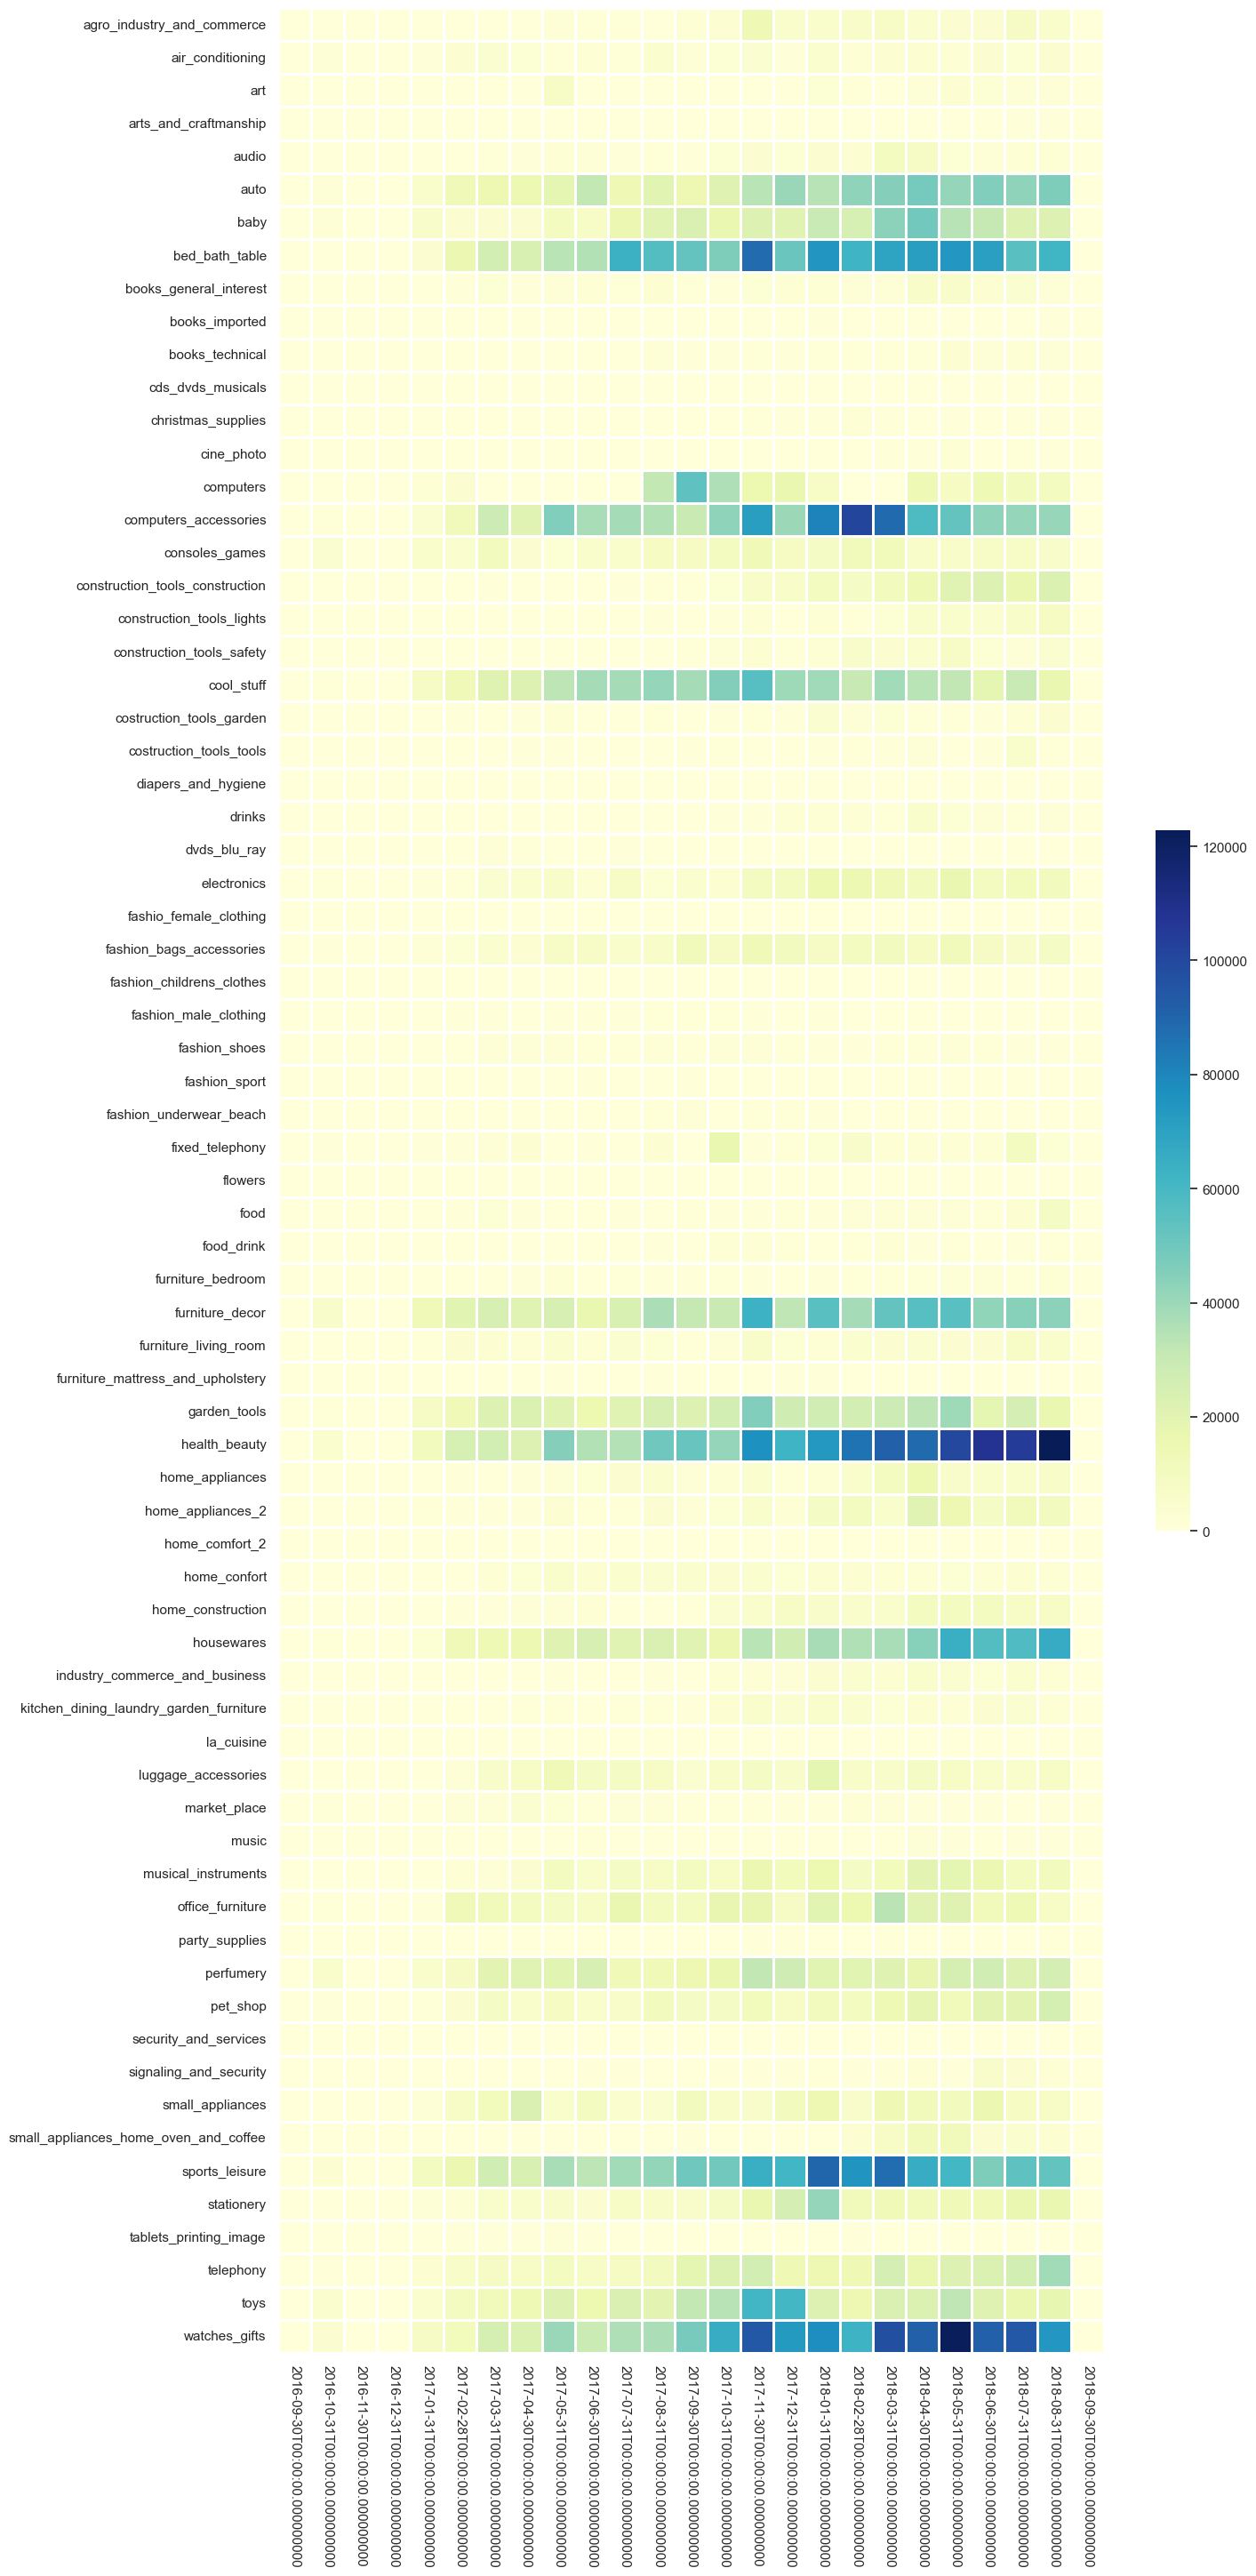

In [633]:
# Melakukan perubahan data type index menjadi datetime dan melakukan resample frequency dari tanggal menjadi bulan
category.index = pd.to_datetime(category.index)
cat_freq_month = category.resample('M').sum()
# Melakukan transpose agar bentuk tabel yang ditampilkan sesuai dengan kebutuhan (timeseries menjadi axis)
cat_freq_month_T = cat_freq_month.T
#menampilkan heatmap menggunakan seaborn
fig, ax = plt.subplots(figsize = (15, 40))
sns.set()
sns.heatmap(cat_freq_month_T, cmap='YlGnBu', linewidths=2, square=True, cbar=True,cbar_kws={"shrink": .2})
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

## 3. Analyze Order Location
Melakukan analisis sales driver berdasarkan customer location

In [634]:
# Mengimpor dan menggabungkan tabel yang dibutuhkan 

location = order_ds.merge(order_item_ds, how='left', on='order_id')
location = location.drop( ['index_x', 'order_purchase_timestamp', 'order_delivered_carrier_date','order_delivered_customer_date', 'order_estimated_delivery_date', 'index_y', 'shipping_limit_date'],axis=1)
location = location.dropna()

order_location = pd.read_sql("SELECT * from olist_order_customer_dataset", con)
location = location.merge(order_location,how='left', on='customer_id')
location = location[['customer_id', 'order_approved_at', 'price', 'customer_state']]

location

,customer_id,order_approved_at,price,customer_state
0,9ef432eb6251297304e76186b10a928d,2017-10-02,29.99,SP
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26,118.70,BA
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,159.90,GO
3,f88197465ea7920adcdbec7375364d82,2017-11-18,45.00,RN
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13,19.90,SP
...,...,...,...,...
112630,1fca14ff2861355f6e5f14306ff977a7,2018-02-06,174.90,SP
112631,1aa71eb042121263aafbe80c1b562c9c,2017-08-27,205.99,BA
112632,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08,179.99,RJ
112633,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08,179.99,RJ


In [635]:
# Menggabungkan tabel berdasarkan tanggal pemesanannya dan lokasi customernya
location = location.groupby(['order_approved_at', 'customer_state'], as_index=False).sum()


C:\Users\Teuku Ghaisa Aufa\AppData\Local\Temp\ipykernel_18204\2398410780.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location = location.groupby(['order_approved_at', 'customer_state'], as_index=False).sum()


In [636]:
# melakukan pivot agar value customer location berubah menjadi nama kolom dan tanggal menjadi index
location = location.dropna()
location = location.pivot(index='order_approved_at', columns='customer_state', values='price')
location

customer_state,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
order_approved_at,,,,,,,,,,,,,,,,,,,,,
2016-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.97,NaN
2016-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.90,NaN,...,NaN,273.20,NaN,NaN,NaN,NaN,199.00,NaN,600.98,NaN
2016-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.9,NaN,NaN,...,319.60,599.00,NaN,NaN,NaN,76.48,119.80,NaN,235.00,NaN
2016-10-06,NaN,NaN,NaN,NaN,19.99,1129.89,790.97,69.9,374.70,NaN,...,413.06,2742.87,148.0,NaN,NaN,1795.65,769.49,NaN,6458.22,NaN
2016-10-07,NaN,49.99,NaN,NaN,NaN,289.60,NaN,NaN,90.99,467.4,...,448.89,2791.39,418.7,NaN,72.89,1465.89,NaN,161.55,2883.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-26,NaN,NaN,NaN,NaN,NaN,NaN,330.00,NaN,NaN,NaN,...,196.80,2360.68,NaN,NaN,NaN,301.00,169.90,NaN,6138.37,NaN
2018-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257.45,128.80,NaN,NaN,NaN,49.99,26.88,NaN,5020.58,NaN
2018-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.90,247.90,NaN,NaN,NaN,116.50,NaN,NaN,4712.00,NaN


In [637]:
#melakukan percobaan agar tabel pivot berubah menjadi tabel dataframe biasa
location = location.rename_axis(None, axis=1)
location = location.reset_index()

In [638]:
location.index = location['order_approved_at']
location = location.drop('order_approved_at',axis=1)


In [639]:
location = location.rename_axis(None, axis=1)
location

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
order_approved_at,,,,,,,,,,,,,,,,,,,,,
2016-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.97,NaN
2016-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.90,NaN,...,NaN,273.20,NaN,NaN,NaN,NaN,199.00,NaN,600.98,NaN
2016-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.9,NaN,NaN,...,319.60,599.00,NaN,NaN,NaN,76.48,119.80,NaN,235.00,NaN
2016-10-06,NaN,NaN,NaN,NaN,19.99,1129.89,790.97,69.9,374.70,NaN,...,413.06,2742.87,148.0,NaN,NaN,1795.65,769.49,NaN,6458.22,NaN
2016-10-07,NaN,49.99,NaN,NaN,NaN,289.60,NaN,NaN,90.99,467.4,...,448.89,2791.39,418.7,NaN,72.89,1465.89,NaN,161.55,2883.54,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-26,NaN,NaN,NaN,NaN,NaN,NaN,330.00,NaN,NaN,NaN,...,196.80,2360.68,NaN,NaN,NaN,301.00,169.90,NaN,6138.37,NaN
2018-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,257.45,128.80,NaN,NaN,NaN,49.99,26.88,NaN,5020.58,NaN
2018-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.90,247.90,NaN,NaN,NaN,116.50,NaN,NaN,4712.00,NaN


In [640]:
location.index.name = None

In [641]:
location = location.fillna(0)

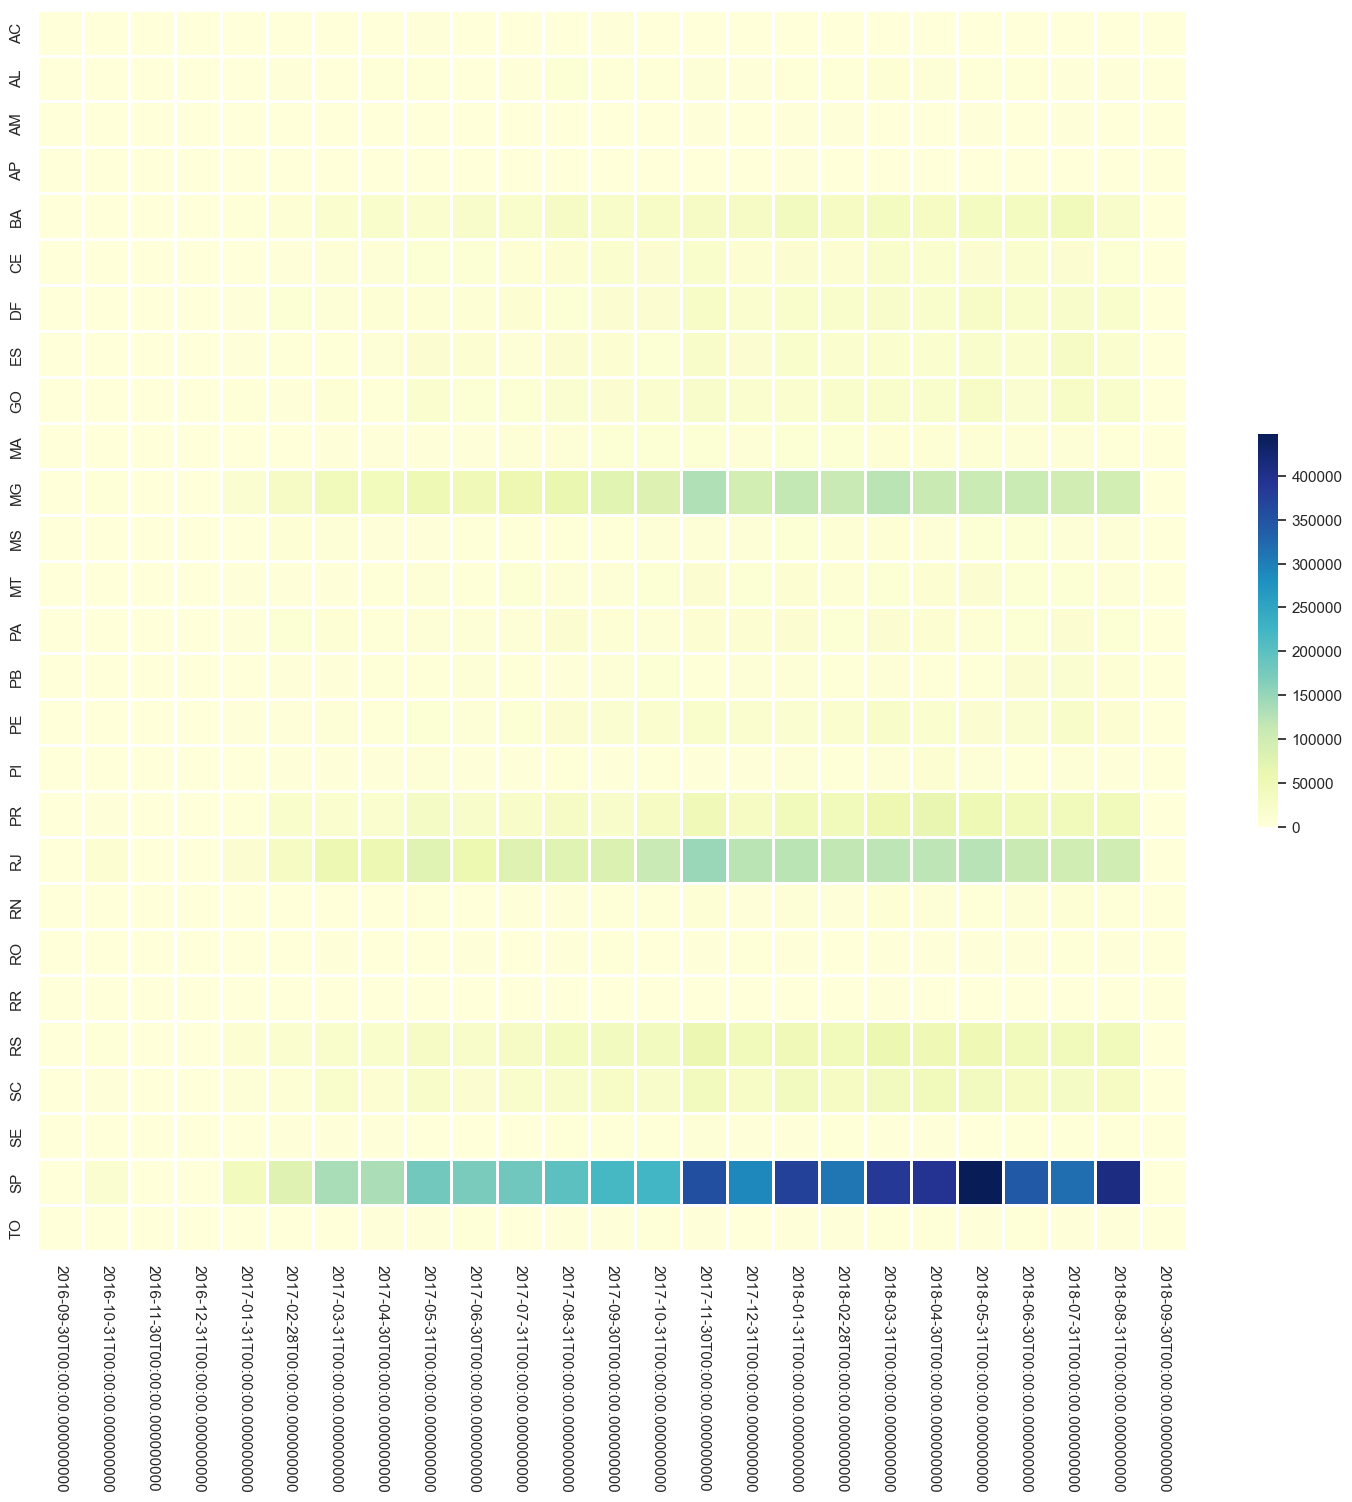

In [642]:
# merubah index data type menjadi date time dan melakukan resample frequency dari tanggal menjadi bulan
location.index = pd.to_datetime(location.index)
loc_freq_month = location.resample('M').sum()
#melakukan transpose agar bentuk tabel sesuai dengan yang diingingkan (timeseries menjadi axis)
loc_freq_month_T = loc_freq_month.T
#melakukan plotting heatmap menggunakan seaborn
fig, ax = plt.subplots(figsize = (15, 20))
sns.set()
sns.heatmap(loc_freq_month_T, cmap='YlGnBu', linewidths=2, square=True, cbar=True,cbar_kws={"shrink": .2})
plt.xticks(rotation=270)
plt.tight_layout()
plt.show()

# KESIMPULAN

Dari data yang ada diketahui:
1. Sales mulai meningkat di bulan Oktober 2017.
2. Penjualan tersebut didrive oleh penjualan barang di kategori berikut:
    - Bed Bath Table
    - Computer Accessories
    - Health Beauty
    - Sports Leisure
    - Watch Gifts
3. Dari segi lokasi customer, penjualan tersebut didrive customer yang berasal dari State:
    - SP
    - RJ
    - MG